In [1]:
import numpy as np 
from scipy.io import arff
import pandas as pd

# Training View 

In [2]:
data1 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension1_TRAIN.arff')

In [3]:
df_D1 = pd.DataFrame(data1[0])

In [4]:
data2 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension2_TRAIN.arff')

In [5]:
df_D2 = pd.DataFrame(data2[0])

In [6]:
data3 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension3_TRAIN.arff')

In [7]:
df_D3 = pd.DataFrame(data3[0])

In [8]:
print(df_D1.shape)
print(df_D2.shape)
print(df_D3.shape)

(1422, 183)
(1422, 183)
(1422, 183)


In [9]:
df_D1 =df_D1.apply(lambda x : x.fillna(method='ffill'), axis=1) 
df_D2 =df_D2.apply(lambda x : x.fillna(method='ffill'), axis=1)
df_D3 =df_D3.apply(lambda x : x.fillna(method='ffill'), axis=1) 

In [10]:
df_D1 = df_D1.drop('target', axis=1)
df_D2 = df_D2.drop('target', axis=1)
df_D3 = df_D3.drop('target', axis=1)

In [11]:
print(df_D1.shape)
print(df_D2.shape)
print(df_D3.shape)

(1422, 182)
(1422, 182)
(1422, 182)


In [12]:
Sort_Dim_1 = np.expand_dims(df_D1.values.reshape(-1),axis=1)
Sort_Dim_2 = np.expand_dims(df_D2.values.reshape(-1),axis=1)
Sort_Dim_3 = np.expand_dims(df_D3.values.reshape(-1),axis=1)

In [13]:
Training_View = np.concatenate((Sort_Dim_1, Sort_Dim_2),axis=1)

In [14]:
Training_View = np.concatenate((Training_View, Sort_Dim_2),axis=1)

In [15]:
Training_View.shape

(258804, 3)

# Testing View

In [16]:
Test_data1 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension1_TEST.arff')

In [17]:
Test_df_D1 = pd.DataFrame(Test_data1[0])

In [18]:
Test_data2 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension2_TEST.arff')

In [19]:
Test_df_D2 = pd.DataFrame(Test_data2[0])

In [20]:
Test_data3 = arff.loadarff('/Users/arslanaliawan/Desktop/Pre-experiment/Multivariate_arff/CharacterTrajectories/CharacterTrajectoriesDimension3_TEST.arff')

In [21]:
Test_df_D3 = pd.DataFrame(Test_data3[0])

In [22]:
print(Test_df_D1.shape)
print(Test_df_D2.shape)
print(Test_df_D3.shape)

(1436, 183)
(1436, 183)
(1436, 183)


In [23]:
Test_df_D1 =Test_df_D1.apply(lambda x : x.fillna(method='ffill'), axis=1) 
Test_df_D2 =Test_df_D2.apply(lambda x : x.fillna(method='ffill'), axis=1)
Test_df_D3 =Test_df_D3.apply(lambda x : x.fillna(method='ffill'), axis=1) 

In [24]:
Test_df_D1 = Test_df_D1.drop('target', axis=1)
Test_df_D2 = Test_df_D2.drop('target', axis=1)
Test_df_D3 = Test_df_D3.drop('target', axis=1)

In [25]:
print(Test_df_D1.shape)
print(Test_df_D2.shape)
print(Test_df_D3.shape)

(1436, 182)
(1436, 182)
(1436, 182)


In [26]:
Sort_Test_Dim_1 = np.expand_dims(Test_df_D1.values.reshape(-1),axis=1)
Sort_Test_Dim_2 = np.expand_dims(Test_df_D2.values.reshape(-1),axis=1)
Sort_Test_Dim_3 = np.expand_dims(Test_df_D3.values.reshape(-1),axis=1)

In [27]:
Testing_View = np.concatenate((Sort_Test_Dim_1, Sort_Test_Dim_2),axis=1)

In [28]:
Testing_View = np.concatenate((Testing_View, Sort_Test_Dim_3),axis=1)

In [29]:
Testing_View.shape

(261352, 3)

In [62]:
finalarray_test_data = Testing_View[:][0:182]

In [63]:
finalarray_test_data.shape

(182, 3)

## Random TS 

In [31]:
Starting_point = Testing_View[:][0:1]
End_point = Testing_View[:][181:182]
Sub_Sampling = Training_View[:][1:185]

In [32]:
number_of_rows = Sub_Sampling.shape[0]
random_indices = np.random.choice(number_of_rows, size=180, replace=False)
random_rows = Sub_Sampling[random_indices, :]

In [33]:
Random_TS = np.concatenate((Starting_point, random_rows),axis=0)

In [34]:
Random_TS = np.concatenate((Random_TS, End_point),axis=0)

In [35]:
Random_TS.shape

(182, 3)

# Pseudo TS

In [36]:
Sub_Sampling_PTS = Testing_View[:][1:181]

In [37]:
Sub_Sampling_PTS.shape

(180, 3)

In [38]:
Pseudo_TS = Sub_Sampling_PTS

In [39]:
PTS = np.concatenate((Starting_point, Pseudo_TS),axis=0)

In [40]:
PTS = np.concatenate((PTS, End_point),axis=0)

In [41]:
PTS.shape

(182, 3)

### Similarity Matrix

In [42]:
from scipy.spatial import distance
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

In [43]:
ED_Matrix = distance.cdist(PTS, PTS, 'euclidean')

In [44]:
ED_Matrix

array([[0.        , 0.23097455, 0.45911542, ..., 1.76422075, 1.76422075,
        1.76422075],
       [0.23097455, 0.        , 0.22847782, ..., 1.98919176, 1.98919176,
        1.98919176],
       [0.45911542, 0.22847782, 0.        , ..., 2.21166769, 2.21166769,
        2.21166769],
       ...,
       [1.76422075, 1.98919176, 2.21166769, ..., 0.        , 0.        ,
        0.        ],
       [1.76422075, 1.98919176, 2.21166769, ..., 0.        , 0.        ,
        0.        ],
       [1.76422075, 1.98919176, 2.21166769, ..., 0.        , 0.        ,
        0.        ]])

### Graph

In [45]:
G = nx.from_numpy_matrix(ED_Matrix, create_using=nx.Graph)

In [46]:
layout = nx.spring_layout(G)
sizes = len(ED_Matrix)

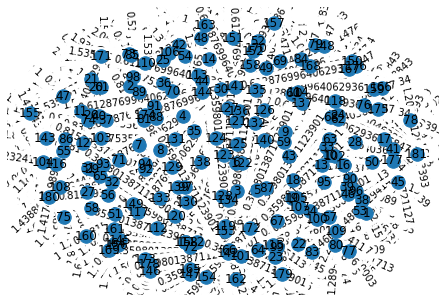

In [47]:
layout = nx.spring_layout(G)
sizes = len(ED_Matrix)
nx.draw(G, layout, with_labels=True, node_size=sizes)
labels = nx.get_edge_attributes(G, "weight")
output = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

# Minimum Spanning Tree

In [48]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

In [49]:
T=nx.minimum_spanning_tree(G)

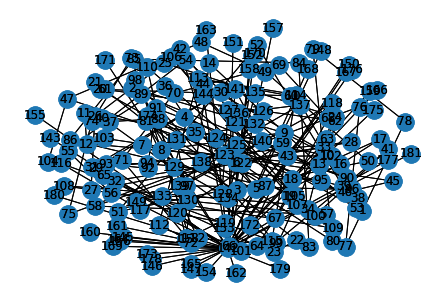

In [50]:
nx.draw(T, layout, with_labels=True)
weight = nx.get_edge_attributes(T, "weight")
nx.draw_networkx(T, pos=layout, edge_labels=weight)
# plt.show()

### Dijkstra ( For getting the nodes )

In [51]:
Dij = nx.dijkstra_path(T,0,181,weight='weight')

### Getting instances that belong to the nodes of the shortest path

In [52]:
a = []

In [53]:
for x in range(len(Dij)):
    
    Index = Dij[x]
    a.append(list(PTS[Index]))


In [54]:
P_TS = np.array(a)

#                                                   DTW

In [55]:
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics.pairwise import euclidean_distances, pairwise_distances
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt

In [56]:
from tslearn.soft_dtw_fast import *
from tslearn.cysax import *
from tslearn.metrics import dtw, dtw_path,dtw_path_from_metric,soft_dtw
from tslearn.utils import *

#### DTW between Testing time series & Pseudo TS

In [64]:
path, dist = dtw_path(finalarray_test_data, P_TS)
print(dist)

9.343086602712134


#### DTW between Testing time series & Random TS

In [65]:
path, dist = dtw_path(finalarray_test_data, Random_TS)
print(dist)

18.47522621433153
